In [1]:
import pandas as pd
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for data analyst data

df_da = df[df['job_title_short'] == 'Data Analyst'].copy()

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: C:\Users\zyesn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Text(137.64444444444445, 0.5, '')

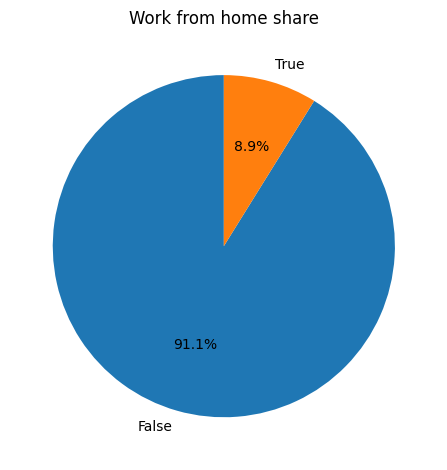

In [2]:
df['job_work_from_home'].value_counts().plot(kind = 'pie', startangle = 90, autopct = '%1.1f%%')
plt.title('Work from home share')
plt.tight_layout()
plt.ylabel('')

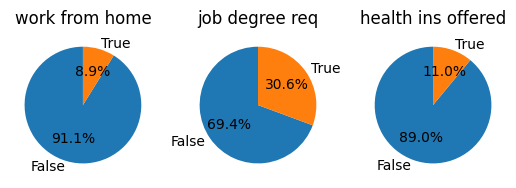

In [3]:
fig, ax = plt.subplots(1, 3)

dict_columns = {
    'job_work_from_home': 'work from home',
    'job_no_degree_mention': 'job degree req',
    'job_health_insurance': 'health ins offered'
}

for index, (column, title) in enumerate(dict_columns.items()):
    ax[index].pie(df[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False','True'])
    ax[index].set_title(title)

plt.show()

In [4]:
df_exploded = df.explode('job_skills')

In [5]:
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg', 'median')
)

In [6]:
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending=False).head(10)

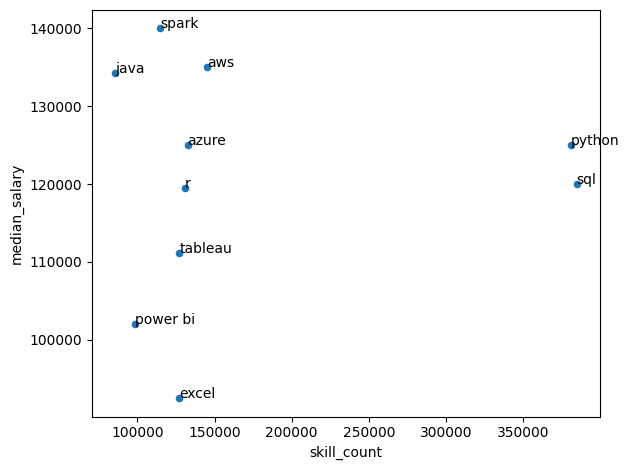

In [7]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')

for index, text in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[index], skill_stats['median_salary'].iloc[index], text)

plt.tight_layout()
plt.show()


In [8]:
#Matplotlib - Advances customization ->

In [9]:
df_da.head(2)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."


In [10]:
# create a new column with month number
df_da['month_number'] = df['job_posted_date'].dt.month

In [11]:
#exploding df_da with subsequent pivoting
df_da_explode = df_da.explode('job_skills')
df_da_pivot = df_da_explode.pivot_table(index = 'month_number', columns='job_skills', aggfunc='size', fill_value=0)

In [12]:
# sort the skills by count, total index creation, then droping total column
df_da_pivot.loc['Total'] = df_da_pivot.sum()
df_da_pivot = df_da_pivot[df_da_pivot.loc['Total'].sort_values(ascending=False).index]
df_da_pivot = df_da_pivot.drop('Total')

In [13]:
df_da_pivot = df_da_pivot.reset_index()

In [14]:
#formatting so that monthl is reflect in shortened format
df_da_pivot['month_name'] = df_da_pivot['month_number'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))

In [15]:
#setting month name as an index for the table
df_da_pivot = df_da_pivot.set_index('month_name')

In [16]:
#dropping the month_number column
df_da_pivot = df_da_pivot.drop(columns = 'month_number')

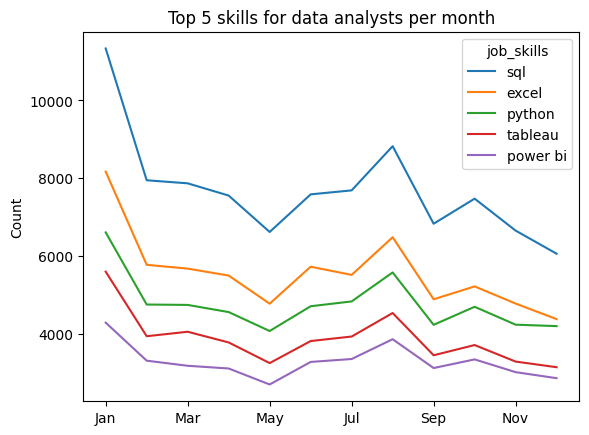

In [17]:
#get the top 5 skills

df_da_pivot.iloc[:, :5].plot(kind = 'line')
plt.title('Top 5 skills for data analysts per month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

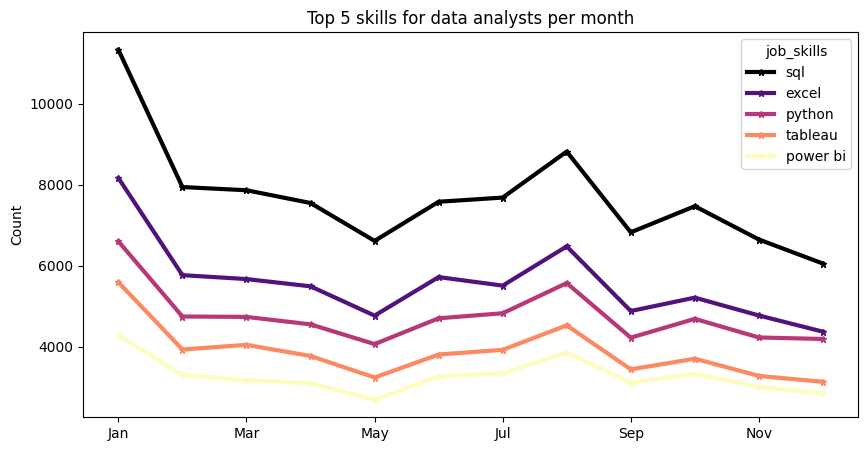

In [18]:
# formatting based on matplotlib
df_da_pivot.iloc[:, :5].plot(
    kind = 'line',
    linewidth = 3,
    linestyle = '-',
    colormap='magma',
    markersize = 5,
    marker = '*',
    figsize = (10,5)
    )
plt.title('Top 5 skills for data analysts per month')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

In [19]:
# installing adjust text modle for graph adjustments
from adjustText import adjust_text

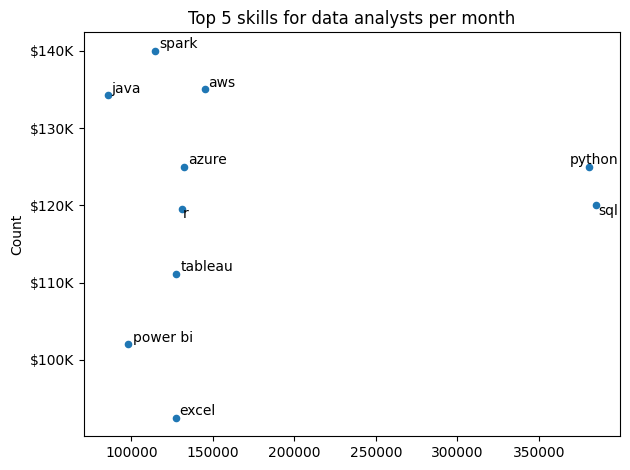

In [20]:
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')

texts = []

for index, text in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[index], skill_stats['median_salary'].iloc[index], text))


adjust_text(texts)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.title('Top 5 skills for data analysts per month')
plt.xlabel('')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [21]:
# histograms ->

In [22]:
# only get da jobs in the US
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'Number of jobs')

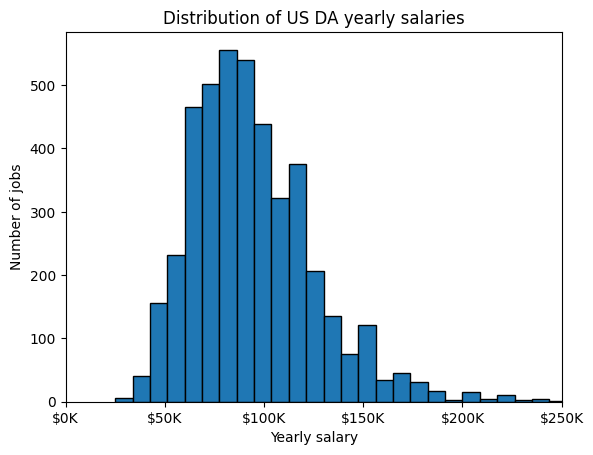

In [23]:
df_da_us['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{int(y)}'))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,250000)
plt.title('Distribution of US DA yearly salaries')
plt.xlabel('Yearly salary')
plt.ylabel('Number of jobs')

In [31]:
job_titles = ['Data Analyst','Data Scientist', 'Data Engineer']

# filter the data to appropriate job_titles and US
df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

In [ ]:
## dropping na in salary year avg
df_us = df_us.dropna(subset = 'salary_year_avg')

In [40]:
# list comprehension for job positions
job_list = [df_us[df_us['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\zyesn\AppData\Local\Temp\ipykernel_12976\1310262526.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


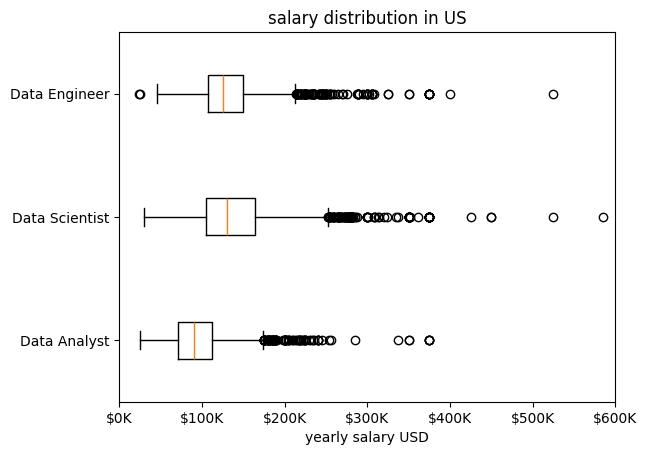

In [49]:
plt.boxplot(job_list, labels = job_titles, vert = False)
plt.xlabel('yearly salary USD')
plt.title('salary distribution in US')
plt.xlim(0,600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()


In [51]:
### Exercise: Skill pay analysis ->

In [52]:
df_da_us = df_da_us.explode('job_skills')

In [62]:
df_da_us = df_da_us[['salary_year_avg','job_skills']]

In [64]:
df_da_us = df_da_us.dropna(subset='salary_year_avg')

In [76]:
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

In [87]:
df_da_top_pay = df_da_us_group.sort_values(by = 'median', ascending = False).head(10)

In [88]:
df_da_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [91]:
df_da_skills = df_da_us_group.sort_values(by = 'count', ascending=False).head(10)

In [92]:
df_da_skills

,count,median
job_skills,,
sql,2508,91000.00
excel,1808,84392.00
python,1431,97500.00
tableau,1364,92875.00
sas,926,90000.00
r,893,92500.00
power bi,838,90000.00
powerpoint,462,85000.00
word,461,81194.75


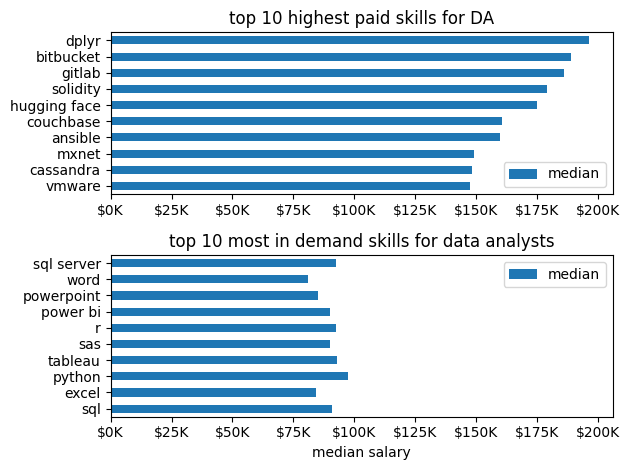

In [ ]:
fig, ax = plt.subplots(2, 1)

# 1st graph
df_da_top_pay[::-1].plot(kind = 'barh', y = 'median',  ax = ax[0], title = 'top 10 highest paid skills for DA', ylabel= '' )
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#2nd graph
df_da_skills.plot(kind = 'barh', y = 'median',  ax = ax[1], xlabel = 'median salary', ylabel= '', title = 'top 10 most in demand skills for data analysts', xlim = ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
fig.tight_layout()

In [137]:
# Seaborn visualisation ->

In [138]:
import seaborn as sns

In [139]:
df_da_us.head(2)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r


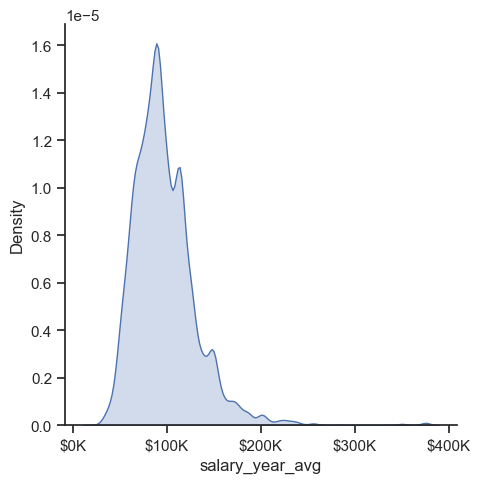

In [155]:
sns.set_theme(style = 'ticks')
sns.displot(df_da_us['salary_year_avg'], kind = 'kde', fill = True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

In [141]:
df_da_us['salary_year_avg']

109       89000.0
109       89000.0
109       89000.0
109       89000.0
180       90250.0
           ...   
784882    87500.0
784882    87500.0
784882    87500.0
784882    87500.0
784882    87500.0
Name: salary_year_avg, Length: 17440, dtype: float64

In [142]:
df_da_us['salary_year_avg'].value_counts()

salary_year_avg
90000.00     1222
115000.00     802
100000.00     650
65000.00      526
125000.00     449
             ... 
92088.00        1
58568.00        1
95400.00        1
89952.00        1
89111.75        1
Name: count, Length: 1024, dtype: int64